# Анализ параметров установок на режимах частичной мощности

## Импорт библиотек

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Latex
from IPython.display import Math
pd.set_option('max_colwidth',80)

## Постоянные

In [2]:
data_root = '/home/artem/gowork/src/github.com/Sovianum/cooling-course-project/notebooks/data/'

## Функции ввода-вывода

### Функции работы с текстом

In [3]:
def get_2_shafts_parameters_note(extremal_value_df):
    pi = extremal_value_df.pi.values[0]
    eta = extremal_value_df.eta.values[0]
    power = extremal_value_df.N_e.values[0] / 1e6
    mass_rate = extremal_value_df.G.values[0]
    return Math(r'''
    \begin{align}
        \pi = %.1f && \eta = %.3f && L_e = %.3f \ МДж/кг && G = %.1f \ кг/с
    \end{align}
    ''' % (pi, eta, power, mass_rate))

### Функции работы с графиками

In [4]:
def plot_characteristic(power, y_arr, ylabel):
    plt.title('$Приведенная \ характеристика \ установки \ (\overline{f} = f / f_{max})$')
    plt.plot(power / power.max(), y_arr)
    plt.ylabel(ylabel, fontsize=20)
    plt.xlabel('$\overline{N_e}$', fontsize=20)
    plt.grid()

def plot_common_characteristics(data, y_min=0.8, y_max=1.02):
    plt.title('$Приведенные \ характеристики \ установки \ (\overline{f} = f / f_{max})$')
    plt.plot(data.power / data.power.max(), data.mass_rate / data.mass_rate.max())
#     plt.plot(data.pi, data.eta / data.eta.max())
    plt.ylim([y_min, y_max])
    plt.xlabel('$\overline{N_e}$', fontsize=20)
    plt.grid()
    plt.legend(['$\overline{G}$', '$\overline{\eta}$'], loc='lower right')

## Загрузка данных 

In [5]:
data_2n = pd.read_json(data_root + '2n.json').sort_values('t')
# data_2nr = pd.read_json(data_root + '2nr.json').sort_values('t')
data_3n = pd.read_json(data_root + '3n.json').sort_values('t')

## Двухвальная установка без регенератора

### Загрузка данных

In [6]:
data_2n = pd.read_json(data_root + '2n.json').sort_values('t')

### Построим общие характеристики установки

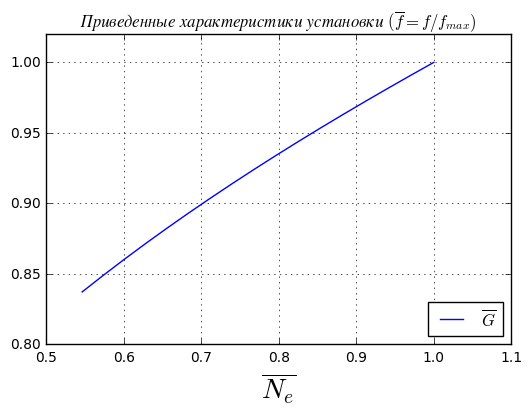

In [7]:
plot_common_characteristics(data_2n)
plt.show()

### Построим зависимость температуры газа от относительной мощности установки

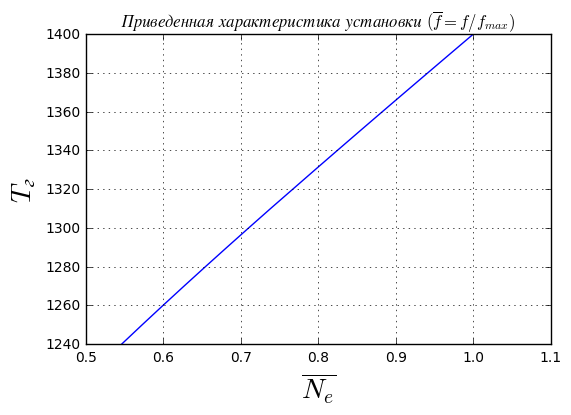

In [8]:
plot_characteristic(data_2n.power, data_2n.t, "$T_г$")
plt.show()

## Двухвальная установка с регенератором

### Загрузка данных

In [9]:
data_2nr = pd.read_json(data_root + '2nr.json').sort_values('t')

### Построим общие характеристики установки

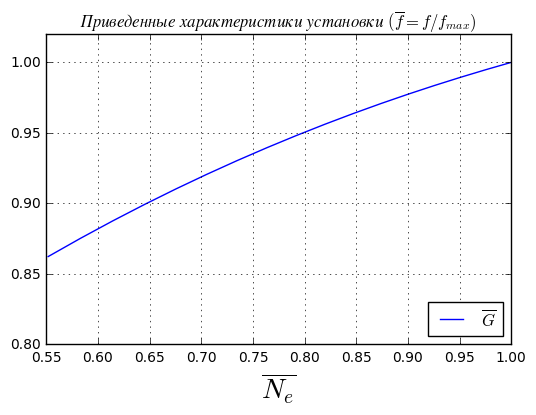

In [10]:
plot_common_characteristics(data_2nr)
plt.show()

### Построим зависимость температуры газа от относительной мощности установки

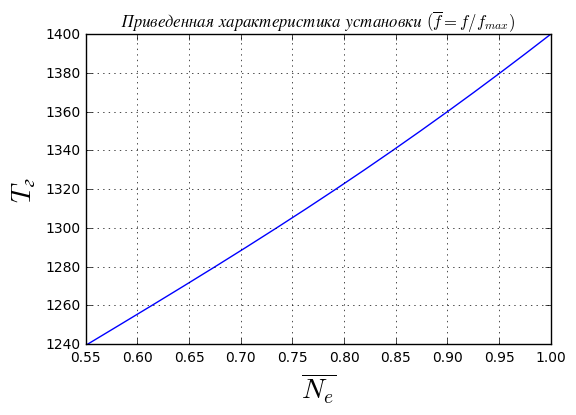

In [11]:
plot_characteristic(data_2nr.power, data_2n.t, "$T_г$")
plt.show()

### Построим зависимость коэффициента восстановления от относительной мощности установки

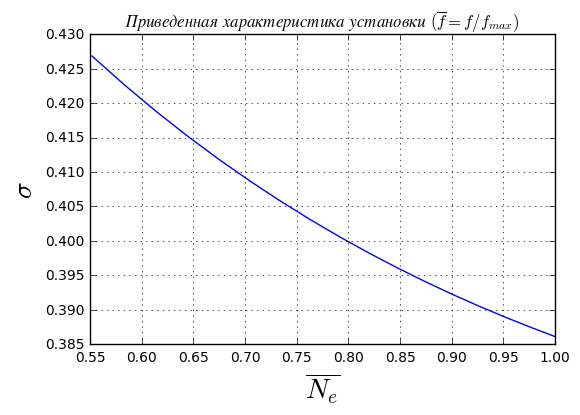

In [12]:
plot_characteristic(data_2nr.power, data_2nr.sigma, "$\sigma$")
plt.show()

## Трехвальная установка без пром. охлаждения, пром. подогрева и регенератора

### Загрузка данных

In [17]:
data_3n = pd.read_json(data_root + '3n.json').sort_values('t')

### Построим общие характеристики установки

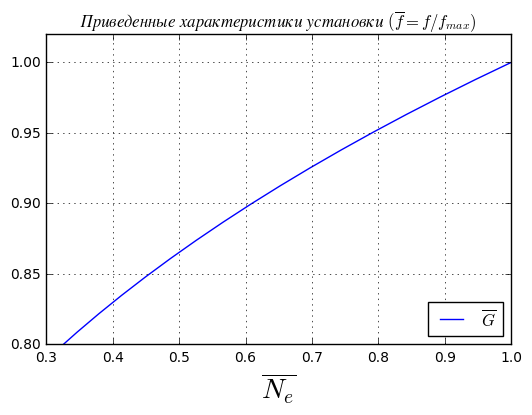

In [18]:
plot_common_characteristics(data_3n)
plt.show()

### Построим зависимость температуры газа от относительной мощности установки

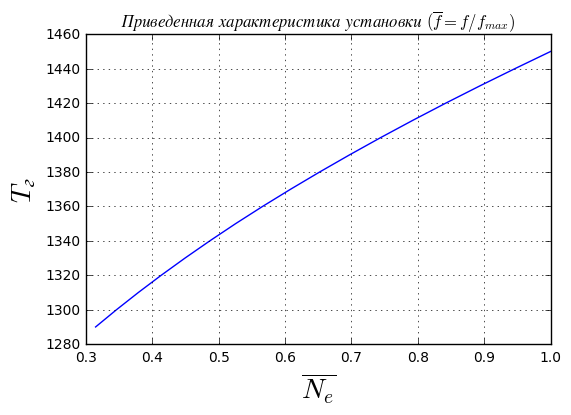

In [19]:
plot_characteristic(data_3n.power, data_3n.t, "$T_г$")
plt.show()

In [21]:
data_3n

,eta,g_norm_ft,g_norm_hpt,g_norm_lpt,mass_rate,pi_ft,pi_hpc,pi_lpc,power,rpm_ft,rpm_hpt,rpm_lpt,t
16,NaN,0.852529,1.0,0.999769,26.023438,1.298555,1.766121,2.166892,1.011800,1066.594413,9186.304080,4544.329837,1290
15,NaN,0.857140,1.0,0.999822,26.454824,1.317558,1.769572,2.207434,1.112798,1101.032996,9239.584957,4597.919119,1300
14,NaN,0.861660,1.0,0.999865,26.885019,1.336590,1.773027,2.247976,1.218573,1134.939183,9292.781369,4649.866799,1310
13,NaN,0.866090,1.0,0.999900,27.313750,1.355646,1.776489,2.288489,1.329134,1168.348252,9345.918602,4700.242034,1320
12,NaN,0.870427,1.0,0.999928,27.740764,1.374718,1.779962,2.328943,1.444481,1201.288889,9399.019403,4749.105154,1330
11,NaN,0.874672,1.0,0.999950,28.165724,1.393799,1.783455,2.369296,1.564587,1233.779685,9452.120747,4796.497207,1340
10,NaN,0.878825,1.0,0.999966,28.588538,1.412887,1.786970,2.409533,1.689464,1265.848645,9505.239037,4842.487834,1350
9,NaN,0.882911,1.0,0.999978,29.012471,1.432101,1.790591,2.449810,1.819905,1297.705526,9558.876262,4887.238161,1360
8,NaN,0.886918,1.0,0.999987,29.435801,1.451384,1.794289,2.490015,1.955607,1329.275480,9612.843861,4930.723912,1370
7,NaN,0.890834,1.0,0.999993,29.856673,1.470671,1.798018,2.530052,2.096175,1360.478593,9666.880337,4972.952932,1380
